# UTS Machine Learning
## IDENTITAS
NAMA : MOCHAMMAD HAIRULLAH <br>
NIM : 2041720074 <br>
KELAS : TI-2H <br>

## PENYELESAIAN TERBAIK : NAIVE BAYES (KLASIFIKASI)

In [ ]:
# Pembagian soal, berdasarkan file PDF Pembagian Soal TI-3H yang telah dibagikan.
# Perhatikan dataset yang diberikan: 
# a) dataset_1 adalah data koordinat trayektori berjalan manusia; 
# b) dataset_2 adalah purchase barang; 
# c) dataset_3 adalah tingkat konsumsi bahan bakar; 
# d) dataset_4 adalah data kondisi lingkungan.

# Pelajari data sesuai dengan pembagian, perhatika  kaitan antar variabel!
# Tentukan teknik penyelesaian terbaik, apakah regresi atau klasifikasi!
# Tentukan metode terbaik sesuai dengan teknik penyelesaian yang telah ditentukan di poin 4!
# Kerjakan penyelesaian kasus dataset pada Google Collab serta berikan visualisasi yang sesuai!
# Buat sebuah video presentasi hasil pengerjaan dengan durasi minimal 10 menit! Unggah video tersebut di YouTube dengan mode Public atau Unlisted
# Cantumkan link Google Collab dan Video di kolom Penugasan ini

# Probabilitas
# 3 kategori = BAIK, SEDANG, TIDAK SEHAT
# 5 stasiun  = DKI1 - DKI5

In [154]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
import numpy as np
import pandas as pd

In [164]:
path = './dataset/dataset_4_uts.xlsx'
df = pd.read_excel(path)
df = pd.DataFrame(df)
df.columns = ['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max', 'critical', 'categori']
df.head()

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2121-11-11 00:00:00,DKI1 (Bunderan HI),31,21,11,32,9,32,O3,BAIK
1,2121-11-12 00:00:00,DKI1 (Bunderan HI),27,22,12,29,8,29,O3,BAIK
2,2121-11-13 00:00:00,DKI1 (Bunderan HI),39,22,14,32,11,39,PM11,BAIK
3,2121-11-14 00:00:00,DKI1 (Bunderan HI),34,22,14,38,11,38,O3,BAIK
4,2121-11-15 00:00:00,DKI1 (Bunderan HI),35,22,12,31,9,35,PM11,BAIK


In [165]:
df.dtypes

tanggal     object
stasiun     object
pm10         int64
so2          int64
co           int64
o3           int64
no2          int64
max          int64
critical    object
categori    object
dtype: object

In [166]:
df.shape

# info df
df.info()

# deskripsi df
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tanggal   155 non-null    object
 1   stasiun   155 non-null    object
 2   pm10      155 non-null    int64 
 3   so2       155 non-null    int64 
 4   co        155 non-null    int64 
 5   o3        155 non-null    int64 
 6   no2       155 non-null    int64 
 7   max       155 non-null    int64 
 8   critical  155 non-null    object
 9   categori  155 non-null    object
dtypes: int64(6), object(4)
memory usage: 12.2+ KB


,pm10,so2,co,o3,no2,max
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,46.200000,18.574194,22.935484,50.129032,7.600000,55.754839
std,14.283493,10.866336,11.394734,20.985681,3.868957,18.735459
min,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000
25%,36.000000,11.000000,15.000000,35.000000,5.000000,41.000000
50%,44.000000,15.000000,21.000000,45.000000,7.000000,51.000000
75%,55.000000,28.500000,27.000000,62.500000,9.000000,65.000000
max,86.000000,61.000000,71.000000,125.000000,21.000000,125.000000


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


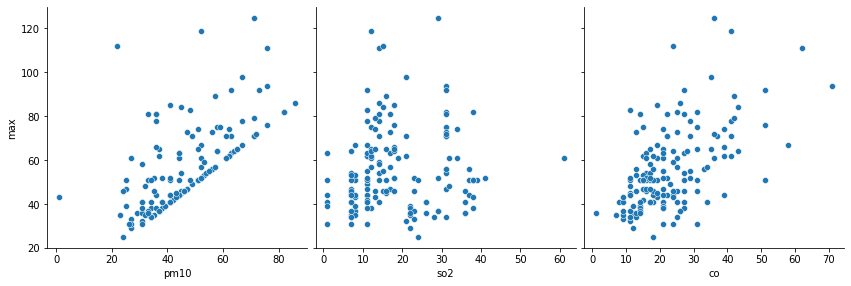

In [167]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.pairplot(df, x_vars=['pm10', 'so2', 'co'], 
             y_vars='max', size=4, aspect=1, kind='scatter')
plt.show()

# MENCARI MEAN [RUMUS]

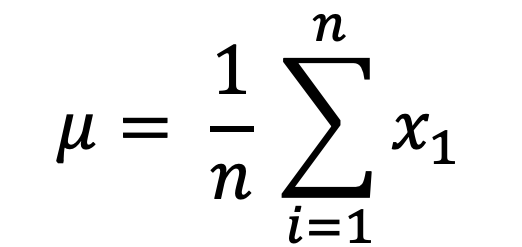

# MENCARI STDEV [RUMUS]

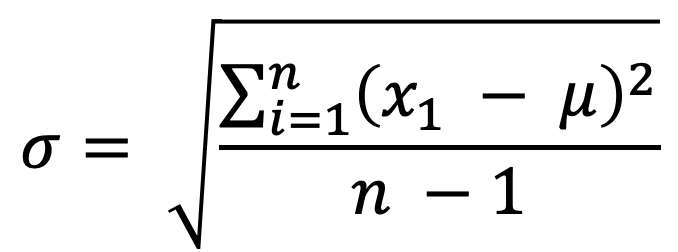

In [169]:
# Klasifikasi PM10

def pm(x):
  return df[(df['categori'] == x)]

pm_baik = pm('BAIK')['pm10'].drop_duplicates()
pm_sedang = pm('SEDANG')['pm10'].drop_duplicates()
pm_tidak_sehat = pm('TIDAK SEHAT')['pm10'].drop_duplicates()

def meanPM(x, y):
  return x / y

mean_pm_baik = meanPM(pm_baik.sum(), pm_baik.count())
mean_pm_sedang = meanPM(pm_sedang.sum(), pm_sedang.count())
mean_pm_tidak_sehat = meanPM(pm_tidak_sehat.sum(), pm_tidak_sehat.count())

std_pm_baik = pm_baik.std()
std_pm_sedang = pm_sedang.std()
std_pm_tidak_sehat = pm_tidak_sehat.std()

print('--- Mencari Mean dan STDEV ---')
print('--- BAIK ---')
print('MEAN   : ', mean_pm_baik)
print('STDEV  : ', std_pm_baik, '\n')
print('--- SEDANG ---')
print('MEAN   : ', mean_pm_sedang)
print('STDEV  : ', std_pm_sedang, '\n')
print('--- TIDAK SEHAT ---')
print('MEAN   : ', mean_pm_tidak_sehat)
print('STDEV  : ', std_pm_tidak_sehat)

--- Mencari Mean dan STDEV ---
--- BAIK ---
MEAN   :  35.12
STDEV  :  10.817886423265252 

--- SEDANG ---
MEAN   :  53.51428571428571
STDEV  :  15.473642539666546 

--- TIDAK SEHAT ---
MEAN   :  55.25
STDEV  :  24.45914961727002


In [170]:
# Klasifikasi SO2
def so(x):
  return df[(df['categori'] == x)]

so_baik = so('BAIK')['so2'].drop_duplicates()
so_sedang = so('SEDANG')['so2'].drop_duplicates()
so_tidak_sehat = so('TIDAK SEHAT')['so2'].drop_duplicates()


def meanSO(x, y):
  return x / y

mean_so_baik = meanSO(so_baik.sum(), so_baik.count())
mean_so_sedang = meanSO(so_sedang.sum(), so_sedang.count())
mean_so_tidak_sehat = meanSO(so_tidak_sehat.sum(), so_tidak_sehat.count())

std_so_baik = so_baik.std()
std_so_sedang = so_sedang.std()
std_so_tidak_sehat = so_tidak_sehat.std()

print('--- Mencari Mean dan STDEV ---')
print('--- BAIK ---')
print('MEAN   : ', mean_so_baik)
print('STDEV  : ', std_so_baik, '\n')
print('--- SEDANG ---')
print('MEAN   : ', mean_so_sedang)
print('STDEV  : ', std_so_sedang, '\n')
print('--- TIDAK SEHAT ---')
print('MEAN   : ', mean_so_tidak_sehat)
print('STDEV  : ', std_so_tidak_sehat)

--- Mencari Mean dan STDEV ---
--- BAIK ---
MEAN   :  21.583333333333332
STDEV  :  10.640025607466189 

--- SEDANG ---
MEAN   :  22.636363636363637
STDEV  :  13.960984596692702 

--- TIDAK SEHAT ---
MEAN   :  17.5
STDEV  :  7.767453465154029


In [171]:
# Klasifikasi CO

def co(x):
  return df[(df['categori'] == x)]

co_baik = co('BAIK')['co'].drop_duplicates()
co_sedang = co('SEDANG')['co'].drop_duplicates()
co_tidak_sehat = co('TIDAK SEHAT')['co'].drop_duplicates()


def meanCO(x, y):
  return x / y

mean_co_baik = meanCO(co_baik.sum(), co_baik.count())
mean_co_sedang = meanCO(co_sedang.sum(), co_sedang.count())
mean_co_tidak_sehat = meanCO(co_tidak_sehat.sum(), co_tidak_sehat.count())

std_co_baik = co_baik.std()
std_co_sedang = co_sedang.std()
std_co_tidak_sehat = co_tidak_sehat.std()

print('--- Mencari Mean dan STDEV ---')
print('--- BAIK ---')
print('MEAN   : ', mean_co_baik)
print('STDEV  : ', std_co_baik, '\n')
print('--- SEDANG ---')
print('MEAN   : ', mean_co_sedang)
print('STDEV  : ', std_co_sedang, '\n')
print('--- TIDAK SEHAT ---')
print('MEAN   : ', mean_co_tidak_sehat)
print('STDEV  : ', std_co_tidak_sehat)

--- Mencari Mean dan STDEV ---
--- BAIK ---
MEAN   :  18.782608695652176
STDEV  :  9.204527155595922 

--- SEDANG ---
MEAN   :  30.20689655172414
STDEV  :  14.082358036982775 

--- TIDAK SEHAT ---
MEAN   :  40.75
STDEV  :  15.861378670636842


In [173]:
# Mencari Probabilitas per Categori
count_all = df['categori'].count()

def categ(x):
  return df[(df['categori'] == x)]

def probabilitas(x, y):
  return x / y

categories_baik = probabilitas(categ('BAIK')['categori'].count(), count_all)
categories_sedang = probabilitas(categ('SEDANG')['categori'].count(), count_all)
categories_tidak_sehat = probabilitas(categ('TIDAK SEHAT')['categori'].count(), count_all)

print('---- PROBABILITAS BERDASARKAN CATEGORI ----')
print("BAIK         : ", categories_baik)
print("SEDANG       : ", categories_sedang)
print("TIDAK SEHAT  : ", categories_tidak_sehat)

---- PROBABILITAS BERDASARKAN CATEGORI ----
BAIK         :  0.45161290322580644
SEDANG       :  0.5225806451612903
TIDAK SEHAT  :  0.025806451612903226


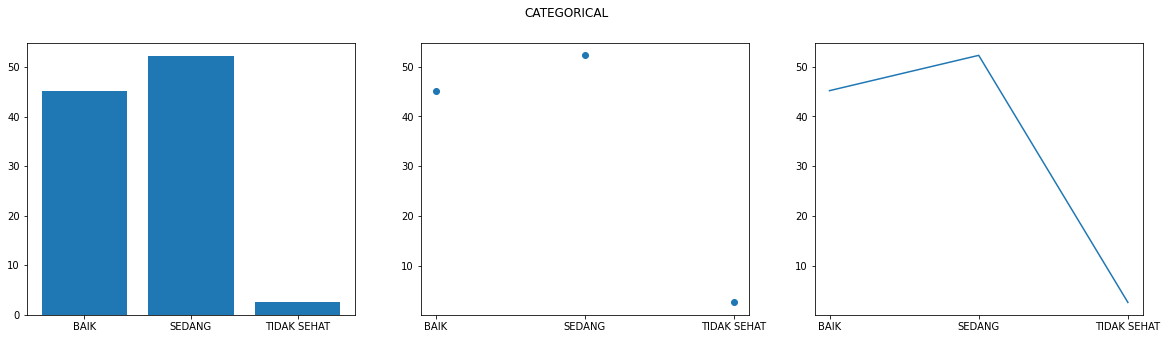

In [174]:
names = ['BAIK', 'SEDANG', 'TIDAK SEHAT']
values = [(categories_baik*100), (categories_sedang*100), (categories_tidak_sehat*100)]

plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('CATEGORICAL')
plt.show()

In [185]:
# Membuat DATA SAMPEL untuk pengujian data
# X = yang akan di gunakan
pm10, so2, co = 31, 21, 11

# Y = yang akan di gunakan
categori_result = ''

In [186]:
# Mencari Probabilitas di setiap kolom
# PM10
def prob(stdev, sampel, mean):
  result = 1 / np.sqrt(2 * 3.14 * stdev) * np.exp(-(pow(sampel - mean, 2))/pow(stdev, 2))
  return result

prob_pm_baik = prob(std_pm_baik, pm10, mean_pm_baik)
prob_pm_sedang = prob(std_pm_sedang, pm10, mean_pm_sedang)
prob_pm_tidak_sehat = prob(std_pm_tidak_sehat, pm10, mean_pm_tidak_sehat)

print('---- PROBABILITAS PM10 ----')
print("BAIK         : ", prob_pm_baik)
print("SEDANG       : ", prob_pm_sedang)
print("TIDAK SEHAT  : ", prob_pm_tidak_sehat)

---- PROBABILITAS PM10 ----
BAIK         :  0.10494354604011777
SEDANG       :  0.01221238619651271
TIDAK SEHAT  :  0.030192602412440064


In [187]:
prob_so_baik = prob(std_so_baik, so2, mean_so_baik)
prob_so_sedang = prob(std_so_sedang, so2, mean_so_sedang)
prob_so_tidak_sehat = prob(std_so_tidak_sehat, so2, mean_so_tidak_sehat)

print('---- PROBABILITAS SO2 ----')
print("BAIK         : ", prob_so_baik)
print("SEDANG       : ", prob_so_sedang)
print("TIDAK SEHAT  : ", prob_so_tidak_sehat)

---- PROBABILITAS SO2 ----
BAIK         :  0.12196731821508569
SEDANG       :  0.10534059357094201
TIDAK SEHAT  :  0.11686979233556904


In [188]:
prob_co_baik = prob(std_co_baik, co, mean_co_baik)
prob_co_sedang = prob(std_co_sedang, co, mean_co_sedang)
prob_co_tidak_sehat = prob(std_co_tidak_sehat, co, mean_co_tidak_sehat)

print('---- PROBABILITAS CO ----')
print("BAIK         : ", prob_co_baik)
print("SEDANG       : ", prob_co_sedang)
print("TIDAK SEHAT  : ", prob_co_tidak_sehat)

---- PROBABILITAS CO ----
BAIK         :  0.06434885021472338
SEDANG       :  0.016550094130357008
TIDAK SEHAT  :  0.0029717683879102496


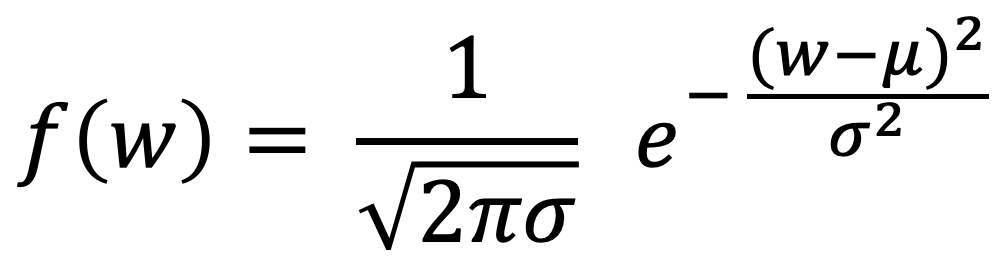

In [189]:
# HASIL KLASIFIKASI

baik = prob_pm_baik * prob_so_baik * prob_co_baik
sedang = prob_pm_sedang * prob_so_sedang * prob_co_sedang
tidak_sehat = prob_pm_tidak_sehat * prob_so_tidak_sehat * prob_co_tidak_sehat

def categoryClas(x, y, z):
  if x > y and x > z:
    result = 'BAIK'
  elif y > x and y > z:
    result = 'SEDANG'
  elif z > x and z > y:
    result = 'TIDAK SEHAT'
  
  return result

print('----- HASIL KLASIFIKASI ----')
print('BAIK         : ', format(float(baik), '.12f'))
print('SEDANG       : ', format(float(sedang), '.12f'))
print('TIDAK SEHAT  : ', format(float(tidak_sehat), '.12f'))
print('----- -------------------- ----')
print('Berdasarkan hasil klasifikasi maka yang terbesar adalah hasil \nakhirnya yang akan menjadi prediksi selanjutnya')

print('RESULT       : ', categoryClas(baik, sedang, tidak_sehat))


----- HASIL KLASIFIKASI ----
BAIK         :  0.000823644876
SEDANG       :  0.000021291034
TIDAK SEHAT  :  0.000010486191
----- -------------------- ----
Berdasarkan hasil klasifikasi maka yang terbesar adalah hasil 
akhirnya yang akan menjadi prediksi selanjutnya
RESULT       :  BAIK
